<a href="https://colab.research.google.com/github/okeefey/MNIST-Digits-classification/blob/main/MNIST_Digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
# Install required libraries
%pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.datasets import mnist

# Set random seed for reproducibility
np.random.seed(0)

In [4]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display shapes of the training and testing data
print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, {y_test.shape}")

Training data shape: (60000, 28, 28), (60000,)
Testing data shape: (10000, 28, 28), (10000,)


# Visualization

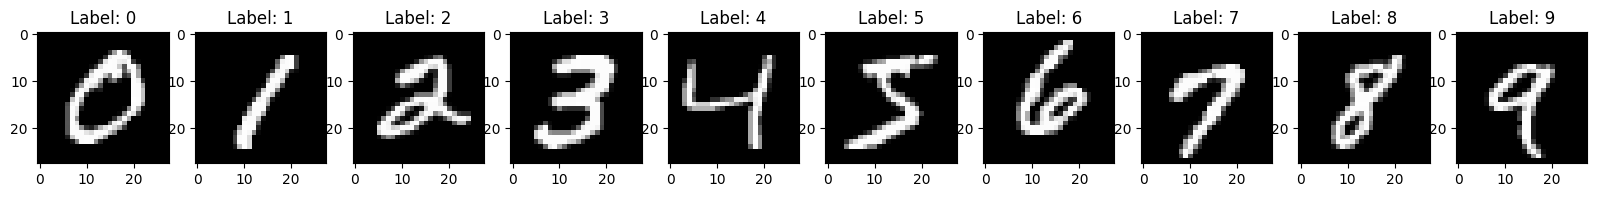

In [6]:
# Visualization of random samples from each class
num_classes = 10
fig, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i in range(num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f"Label: {i}", fontsize=12)


In [7]:
# Display the first few labels
print("First 10 training labels:")
for label in y_train[:10]:
    print(label)

First 10 training labels:
5
0
4
1
9
2
1
3
1
4


In [16]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### Creates an array for each number and adds a 1 depending on which index the number represents.

In [9]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


# Preparing data

In [11]:
# Normalize data

x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
# Reshape data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Create Model

In [12]:
# Display shape after reshaping
print(f"Training data shape after reshaping: {x_train.shape}")

# Create a simple neural network model
model = Sequential([
    Dense(128, input_shape=(784,), activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.05),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Training data shape after reshaping: (60000, 784)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training data

In [20]:
batch_size = 512
epochs = 20
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7184 - loss: 0.9911
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9383 - loss: 0.2113
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9552 - loss: 0.1567
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9654 - loss: 0.1184
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9716 - loss: 0.0940
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9758 - loss: 0.0801
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9810 - loss: 0.0644
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9834 - loss: 0.0574
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9864 - loss: 0.0472
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9894 - loss: 0.0394
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9884 - loss: 0.0378
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

# Evaluate performance

In [21]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9761 - loss: 0.0903
Test Loss: 0.07577936351299286
Test Accuracy: 0.9796000123023987


In [22]:
# Predict the classes on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Display predicted and true labels for the first 10 samples
print("First 10 predicted labels:", y_pred_classes[:10])
print("First 10 true labels:", np.argmax(y_test, axis=1)[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
First 10 predicted labels: [7 2 1 0 4 1 4 9 6 9]
First 10 true labels: [7 2 1 0 4 1 4 9 5 9]


#### Single example

Text(0.5, 1.0, 'Predicted: 6, True: 6')

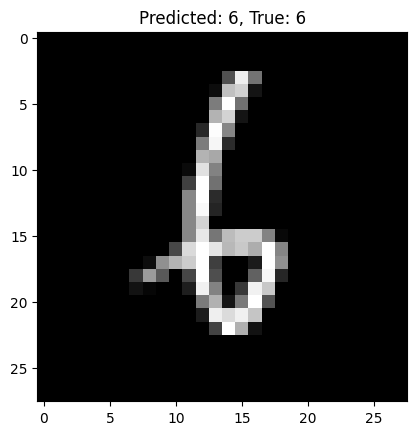

In [23]:
# Visualize a random sample with its predicted and true labels
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_sample_true = y_test[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.imshow(x_sample.reshape((28, 28)), cmap='gray')
plt.title(f"Predicted: {y_sample_pred_class}, True: {np.argmax(y_sample_true)}", fontsize=12)

#### Confusion Matrix

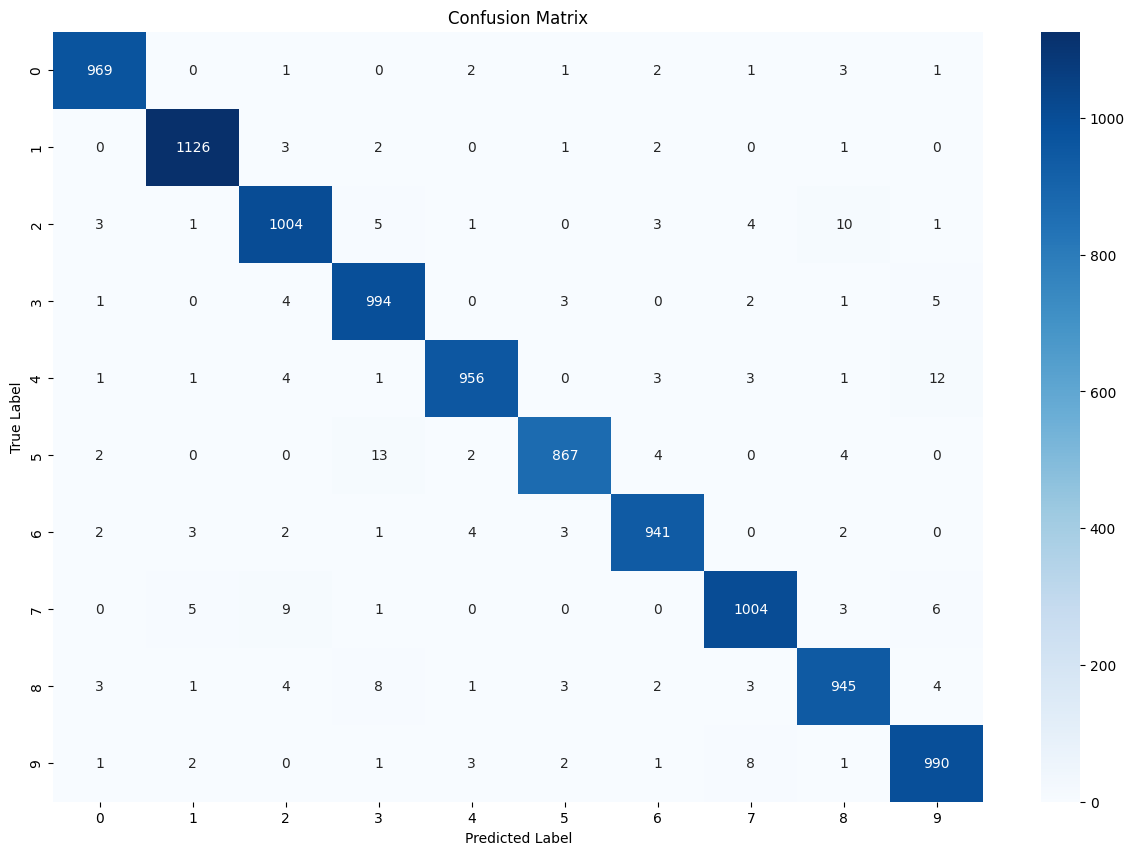

In [25]:
# Confusion Matrix
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Investigation into errors

In [26]:
# Investigate errors in predictions
errors = (y_pred_classes != y_true)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [27]:
# Find errors with the highest prediction probabilities
y_pred_errors_probability = np.max(y_pred_errors, axis=1)

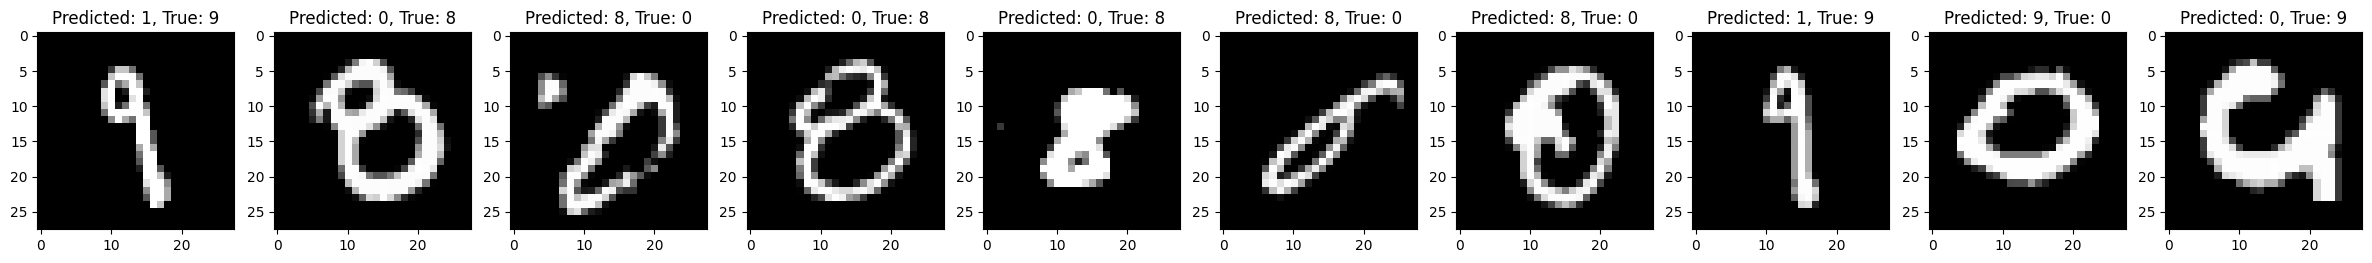

In [28]:
# Show Top N errors based on prediction difference
N = 10
diff_errors = np.abs(y_pred_classes_errors - y_true_errors)
top_idx_diff_errors = np.argsort(diff_errors)[-N:]

# Visualize the top N errors
fig, ax = plt.subplots(1, N, figsize=(30, 30))

for i, idx in enumerate(top_idx_diff_errors):
    sample = x_test_errors[idx].reshape(28, 28)
    y_t = y_true_errors[idx]
    y_p = y_pred_classes_errors[idx]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f"Predicted: {y_p}, True: {y_t}", fontsize=12)